In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO

ModuleNotFoundError: No module named 'statsmodels'

load the data

In [ ]:
url = "https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv"
response = requests.get(url)
df = pd.read_csv(StringIO(response.text)).rename(columns={"time": "date"})
df

,date,AdrActCnt,AdrBalCnt,AssetCompletionTime,AssetEODCompletionTime,BlkCnt,CapMVRVCur,CapMrktCurUSD,CapMrktEstUSD,FeeTotNtv,...,ReferenceRateETH,ReferenceRateEUR,ReferenceRateUSD,SplyCur,SplyExNtv,SplyExUSD,SplyExpFut10yr,TxCnt,TxTfrCnt,volume_reported_spot_usd_1d
0,2009-01-03,0.0,0.0,1.614335e+09,1.614335e+09,0.0,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,0.0,0.0,NaN
1,2009-01-04,0.0,0.0,1.614335e+09,1.614335e+09,0.0,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,0.0,0.0,NaN
2,2009-01-05,0.0,0.0,1.614335e+09,1.614335e+09,0.0,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,0.0,0.0,NaN
3,2009-01-06,0.0,0.0,1.614335e+09,1.614335e+09,0.0,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,0.0,0.0,NaN
4,2009-01-07,0.0,0.0,1.614335e+09,1.614335e+09,0.0,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142,2025-10-28,693980.0,55213014.0,1.761710e+09,1.761710e+09,162.0,2.026985,2.252973e+12,2.252936e+12,3.007122,...,27.698503,97890.392021,114087.773805,1.994122e+07,2.560134e+06,2.892457e+11,2.081786e+07,526865.0,990910.0,2.964965e+10
6143,2025-10-29,667087.0,55236716.0,1.761793e+09,1.761793e+09,123.0,1.974857,2.197692e+12,2.197665e+12,2.554131,...,28.355989,97015.062718,112980.685846,1.994161e+07,2.556524e+06,2.817451e+11,2.081796e+07,395521.0,759509.0,1.989929e+10
6144,2025-10-30,708971.0,55264825.0,1.761880e+09,1.761880e+09,160.0,1.932525,2.154141e+12,2.154107e+12,2.863808,...,28.237444,94991.767972,110206.347983,1.994211e+07,2.562006e+06,2.767472e+11,2.081808e+07,551534.0,981225.0,2.091853e+10
6145,2025-10-31,723709.0,55301897.0,1.761964e+09,1.761964e+09,140.0,1.959627,2.184790e+12,2.184731e+12,3.455848,...,28.493109,93414.662428,108019.723842,1.994254e+07,2.564626e+06,2.809657e+11,2.081819e+07,460460.0,991275.0,1.682027e+10


In [ ]:
df[['date','PriceUSD']]
df['ma200'] = df['PriceUSD'].rolling(window=200).mean()

In [ ]:
eth = pd.read_csv("eth_prices.csv", parse_dates=["date"], index_col="date")
eth["log"] = np.log(eth["priceClose"])
eth

,priceClose,log
date,,
2025-10-16,3894.754390,8.267386
2025-10-15,3987.459563,8.290910
2025-10-14,4125.412116,8.324921
2025-10-13,4245.467989,8.353607
2025-10-12,4164.427885,8.334334
...,...,...
2018-08-26,275.197000,5.617487
2018-08-25,279.646000,5.633525
2018-08-24,282.967000,5.645330


In [ ]:
btc = df[['date','PriceUSD','ma200']] 
btc['date'] = pd.to_datetime(btc['date'])
btc.set_index('date', inplace=True)
btc['log'] = np.log(btc['PriceUSD'])
btc

C:\Users\AA\AppData\Local\Temp\ipykernel_100\4115020047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['date'] = pd.to_datetime(btc['date'])
C:\Users\AA\AppData\Local\Temp\ipykernel_100\4115020047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['log'] = np.log(btc['PriceUSD'])


,PriceUSD,ma200,log
date,,,
2009-01-03,NaN,NaN,NaN
2009-01-04,NaN,NaN,NaN
2009-01-05,NaN,NaN,NaN
2009-01-06,NaN,NaN,NaN
2009-01-07,NaN,NaN,NaN
...,...,...,...
2025-10-28,112980.685846,109119.443787,11.634972
2025-10-29,110206.347983,109244.129279,11.610110
2025-10-30,108019.723842,109366.383126,11.590069


In [ ]:
btc = btc["2018-08-22":"2025-10-16"]
btc

,PriceUSD,ma200,log
date,,,
2018-08-22,6365.009832,7928.619466,8.758571
2018-08-23,6516.409025,7919.948877,8.782079
2018-08-24,6697.731879,7919.189823,8.809524
2018-08-25,6745.438939,7914.223798,8.816622
2018-08-26,6689.869333,7909.550168,8.808350
...,...,...,...
2025-10-12,115152.917045,106841.343459,11.654016
2025-10-13,115332.252930,106981.948104,11.655572
2025-10-14,113327.079410,107127.038109,11.638033


In [ ]:
data = eth.join(btc, how="inner", lsuffix="_eth", rsuffix="_btc")
data

,priceClose,log_eth,PriceUSD,ma200,log_btc
date,,,,,
2025-10-16,3894.754390,8.267386,108135.049606,107398.459490,11.591136
2025-10-15,3987.459563,8.290910,110862.872485,107268.866576,11.616049
2025-10-14,4125.412116,8.324921,113327.079410,107127.038109,11.638033
2025-10-13,4245.467989,8.353607,115332.252930,106981.948104,11.655572
2025-10-12,4164.427885,8.334334,115152.917045,106841.343459,11.654016
...,...,...,...,...,...
2018-08-26,275.197000,5.617487,6689.869333,7909.550168,8.808350
2018-08-25,279.646000,5.633525,6745.438939,7914.223798,8.816622
2018-08-24,282.967000,5.645330,6697.731879,7919.189823,8.809524


In [ ]:
data.rename(columns={"priceClose": "eth_price",'PriceUSD':'btc_price'}, inplace=True)
data

,eth_price,log_eth,btc_price,ma200,log_btc
date,,,,,
2025-10-16,3894.754390,8.267386,108135.049606,107398.459490,11.591136
2025-10-15,3987.459563,8.290910,110862.872485,107268.866576,11.616049
2025-10-14,4125.412116,8.324921,113327.079410,107127.038109,11.638033
2025-10-13,4245.467989,8.353607,115332.252930,106981.948104,11.655572
2025-10-12,4164.427885,8.334334,115152.917045,106841.343459,11.654016
...,...,...,...,...,...
2018-08-26,275.197000,5.617487,6689.869333,7909.550168,8.808350
2018-08-25,279.646000,5.633525,6745.438939,7914.223798,8.816622
2018-08-24,282.967000,5.645330,6697.731879,7919.189823,8.809524


conduct cointegration test: no cointegration correlation

In [ ]:
result = sm.tsa.stattools.coint(data["log_eth"], data["log_btc"])
result

(np.float64(-1.7515580973529377),
 np.float64(0.6529396553100199),
 array([-3.90067517, -3.33849104, -3.04608857]))

In [ ]:
# calculate p_value for evrery rolling window of 90 days
window_size = 90
p_values = []
end_date = []
for start in range(len(data) - window_size + 1):
    end = start + window_size
    window_data = data.iloc[start:end]
    coint_result = sm.tsa.stattools.coint(window_data["log_eth"], window_data["log_btc"])
    end_date.append(window_data.index[-1])
    p_values.append(coint_result[1])

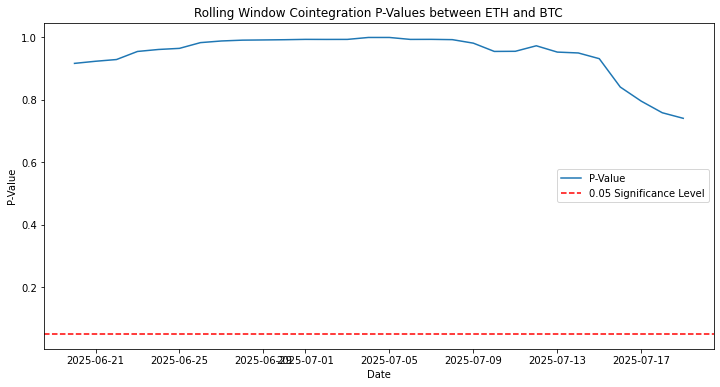

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(end_date[:30], p_values[:30], label="P-Value")
plt.axhline(y=0.05, color='r', linestyle='--', label="0.05 Significance Level")
plt.title("Rolling Window Cointegration P-Values between ETH and BTC")
plt.xlabel("Date")
plt.ylabel("P-Value")
plt.legend()
plt.show()

In [ ]:
data

,eth_price,log_eth,btc_price,ma200,log_btc
date,,,,,
2025-10-16,3894.754390,8.267386,108135.049606,107398.459490,11.591136
2025-10-15,3987.459563,8.290910,110862.872485,107268.866576,11.616049
2025-10-14,4125.412116,8.324921,113327.079410,107127.038109,11.638033
2025-10-13,4245.467989,8.353607,115332.252930,106981.948104,11.655572
2025-10-12,4164.427885,8.334334,115152.917045,106841.343459,11.654016
...,...,...,...,...,...
2018-08-26,275.197000,5.617487,6689.869333,7909.550168,8.808350
2018-08-25,279.646000,5.633525,6745.438939,7914.223798,8.816622
2018-08-24,282.967000,5.645330,6697.731879,7919.189823,8.809524


calculate 30-day correlation between two coins

In [ ]:
data["eth_ret"] = np.log(data["eth_price"] / data["eth_price"].shift(1))
data["btc_ret"] = np.log(data["btc_price"] / data["btc_price"].shift(1))
window = 30  
data["rolling_corr"] = data["eth_ret"].rolling(window).corr(data["btc_ret"])

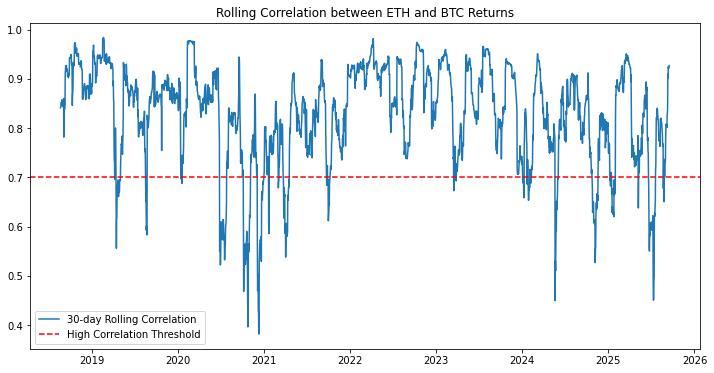

In [ ]:
data["signal"] = 0
data.loc[(data["rolling_corr"] > 0.7) & (np.sign(data["eth_ret"]) != np.sign(data["btc_ret"])), "signal"] = 1

plt.figure(figsize=(12,6))
plt.plot(data.index, data["rolling_corr"], label="30-day Rolling Correlation")
plt.axhline(0.7, color="red", linestyle="--", label="High Correlation Threshold")
plt.legend()
plt.title("Rolling Correlation between ETH and BTC Returns")
plt.show()

In [ ]:
data["rolling_corr"].mean(), data["rolling_corr"].std()

(np.float64(0.8289555753642818), np.float64(0.10117273662315406))

mean_corr: 0.829
std_corr: 0.101


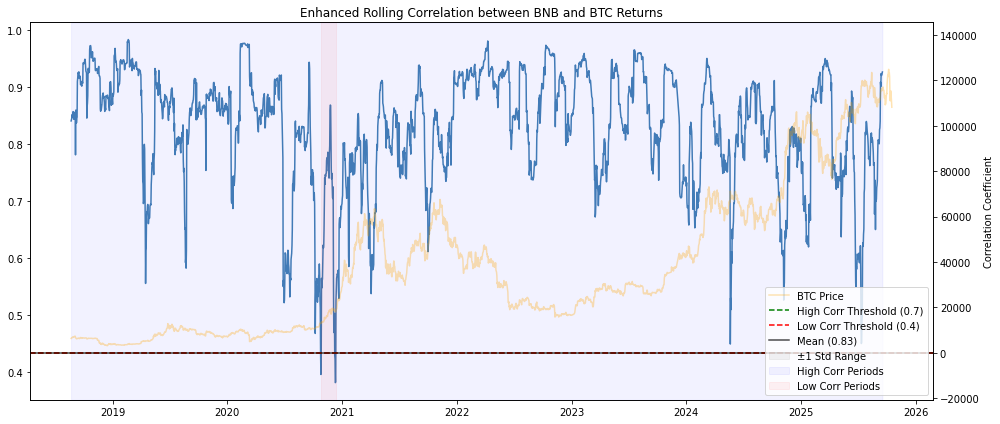

In [ ]:


corr = data["rolling_corr"].dropna()

mean_corr = corr.mean()
std_corr = corr.std()

print(f"mean_corr: {mean_corr:.3f}")
print(f"std_corr: {std_corr:.3f}")
plt.figure(figsize=(14,6))
plt.plot(corr.index, corr, label='30-day Rolling Correlation', color='steelblue')
plt.twinx()
plt.plot(data.index, data["btc_price"], label='BTC Price', color='orange', alpha=0.3)
plt.ylabel("BTC Price (USD)")
plt.axhline(0.7, color='green', linestyle='--', label='High Corr Threshold (0.7)')
plt.axhline(0.4, color='red', linestyle='--', label='Low Corr Threshold (0.4)')

plt.axhline(mean_corr, color='black', linestyle='-', alpha=0.7, label=f'Mean ({mean_corr:.2f})')
plt.fill_between(corr.index, mean_corr-std_corr, mean_corr+std_corr, color='gray', alpha=0.1, label='±1 Std Range')

high_corr_periods = corr[corr >= 0.7]
low_corr_periods = corr[corr <= 0.4]

plt.fill_between(high_corr_periods.index, 0, 1, color='blue', alpha=0.05, transform=plt.gca().get_xaxis_transform(), label='High Corr Periods')
plt.fill_between(low_corr_periods.index, 0, 1, color='red', alpha=0.05, transform=plt.gca().get_xaxis_transform(), label='Low Corr Periods')

plt.title("Enhanced Rolling Correlation between BNB and BTC Returns")
plt.xlabel("Date")
plt.ylabel("Correlation Coefficient")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

⚠️ 检测到数据为倒序排列（最近→最早），自动调整为升序
✅ 执行计划预览：
              BTC Price       ρ30  Buy Weight    Buy USD  BTC Bought  \
date                                                                   
2025-10-07  4451.151669  0.825786    0.872399  87.239875    0.000718   
2025-10-08  4527.648174  0.828762    0.000000   0.000000    0.000000   
2025-10-09  4369.143754  0.840579    0.875387  87.538731    0.000720   
2025-10-10  3843.008795  0.909354    0.936946  93.694619    0.000824   
2025-10-11  3750.611531  0.901786    0.961778  96.177801    0.000867   
2025-10-12  4164.427885  0.924340    0.000000   0.000000    0.000000   
2025-10-13  4245.467989  0.921108    0.000000   0.000000    0.000000   
2025-10-14  4125.412116  0.921667    0.945291  94.529073    0.000834   
2025-10-15  3987.459563  0.924932    0.967582  96.758152    0.000873   
2025-10-16  3894.754390  0.927088    0.993188  99.318824    0.000918   

            Cumulative BTC  
date                        
2025-10-07       10.174572  
2025-10-0

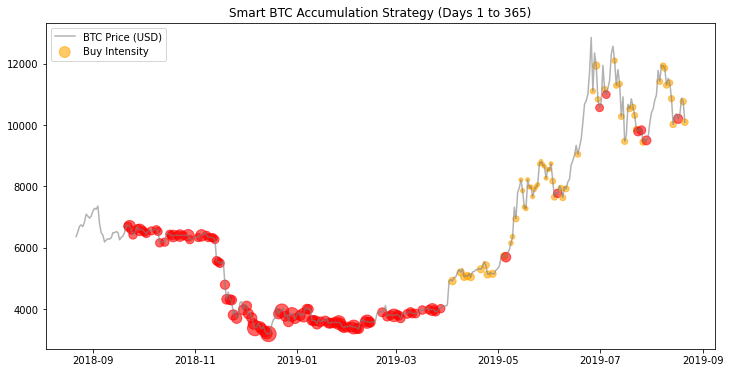

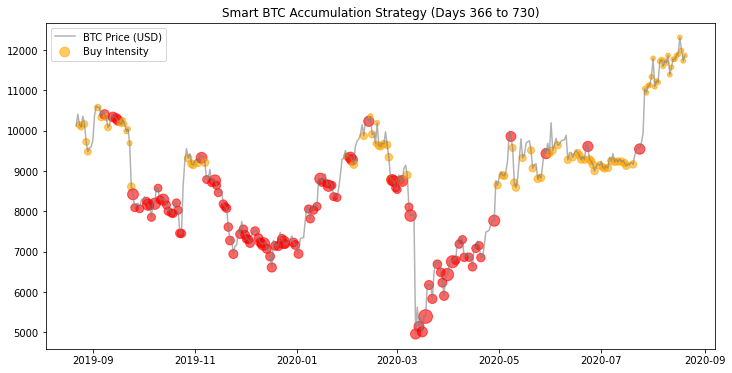

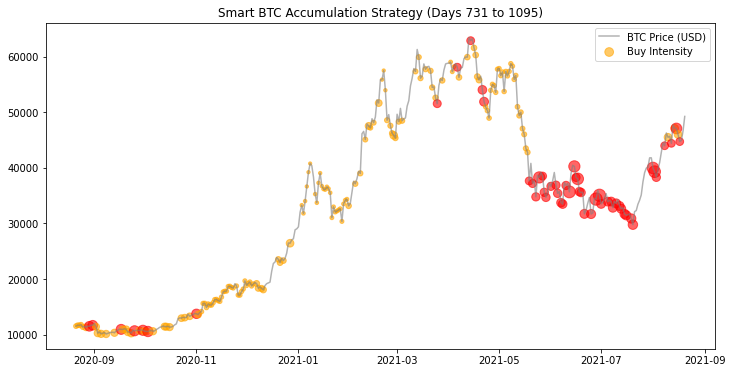

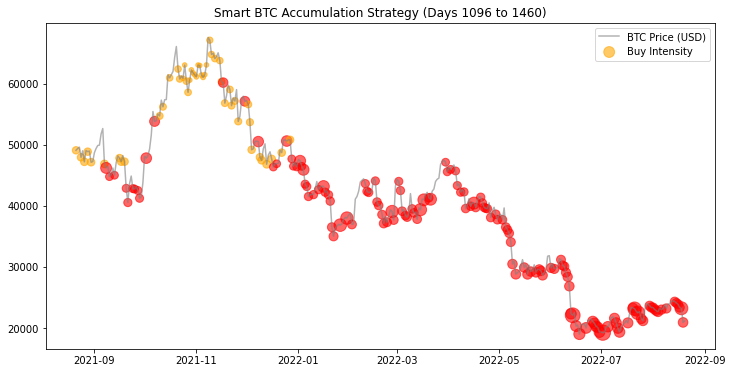

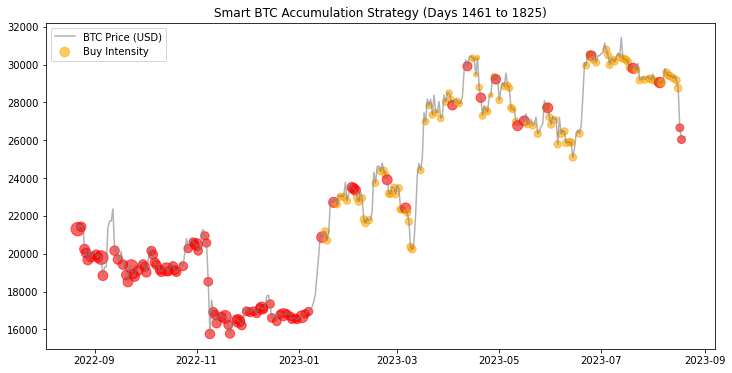

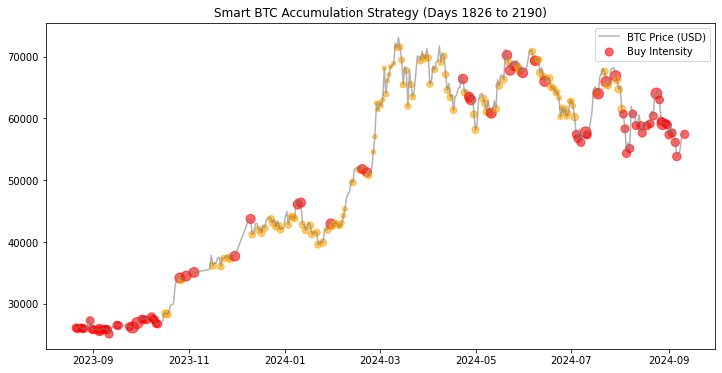

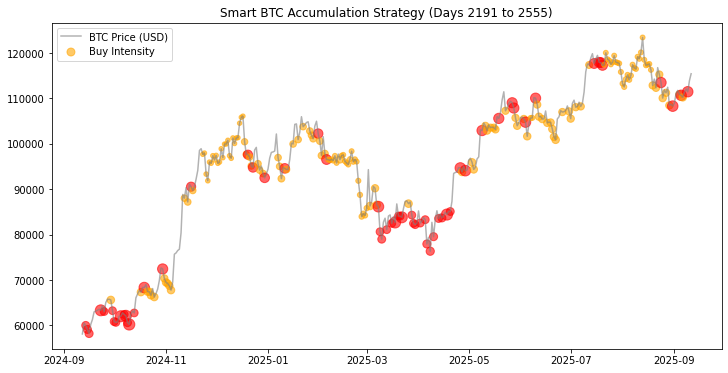

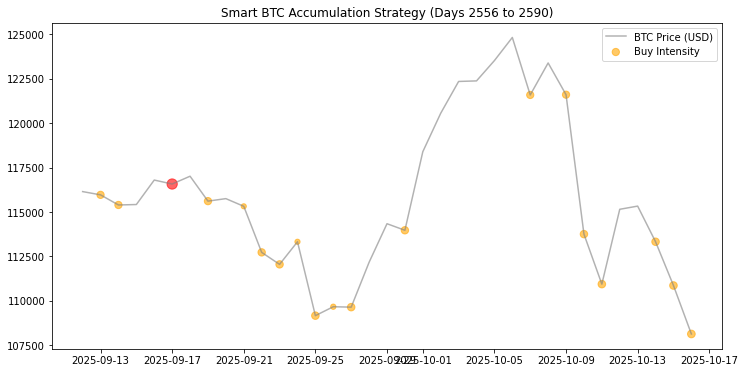

In [ ]:


# === Step 1️⃣ calculate returns and rolling correlation ===
data["btc_ret"] = np.log(data["btc_price"] / data["btc_price"].shift(1))
data["eth_ret"] = np.log(data["eth_price"] / data["eth_price"].shift(1))
data["rolling_corr_30"] = data["btc_ret"].rolling(30).corr(data["eth_ret"])
# === Step 2️⃣ strategy logic: generate today's signal ===
def buy_weight(row):
def buy_weight(row):
    rho = row["rolling_corr_30"]
    btc_ret = row["btc_ret"]
    bnb_ret = row["eth_ret"]
    percentage = row['ma200']/row['btc_price']
    # If correlation is NaN: return NaN (no signal)
    if pd.isna(rho):
        return np.nan
    # Low-correlation period: pause buying
    if rho < 0.4:
        return 0.0*percentage
    # Moderate-correlation period: conservative DCA
    elif rho < 0.7:
        return 0.5*percentage
    # High-correlation period: use short-term contrarian signal to scale up
    else:
        if btc_ret < 0 and bnb_ret > 0:
            return 2*percentage  # ETH up while BTC down -> strong add
        elif btc_ret < 0 and bnb_ret < 0:
            return 1*percentage   # both down -> normal buy
        else:
            return 0  # other cases -> reduce

data["signal_today"] = data.apply(buy_weight, axis=1)

# === Step 3️⃣ execute next day (shift) ===
data["buy_weight_exec"] = data["signal_today"]

# === Step 4️⃣ simulate buys ===
base_invest = 100  # 每次基础投入美元
data["buy_usd"] = base_invest * data["buy_weight_exec"]
data["btc_to_buy"] = data["buy_usd"] / data["btc_price"]
data["btc_cum"] = data["btc_to_buy"].cumsum()

# === Step 5️⃣ output execution plan ===
plan = data[["eth_price", "rolling_corr_30", "buy_weight_exec", "buy_usd", "btc_to_buy", "btc_cum"]].dropna()
plan.columns = ["BTC Price", "ρ30", "Buy Weight", "Buy USD", "BTC Bought", "Cumulative BTC"]
data["buy_weight_exec"] = data["buy_weight_exec"].fillna(0)
print("✅ 执行计划预览：")
print(plan.tail(10))

# === Step 6️⃣ visualization ===
# Plot BTC price and purchase intensity. One plot per 365-day window; color indicates buy intensity.
# Each window contains up to 365 rows; create a plot for each window.
for start in range(0, len(data), 365):
    end = start + 365
    window_data = data.iloc[start:end]
    
    plt.figure(figsize=(12,6))
    plt.plot(window_data.index, window_data["btc_price"], color="gray", alpha=0.6, label="BTC Price (USD)")
    # 不同颜色表示买入强度
    plt.scatter(window_data.index, window_data["btc_price"], 
                s=window_data["buy_weight_exec"]*60, 
                color=np.where(window_data["buy_weight_exec"]>1, 'red', 'orange'), 
                alpha=0.6, label="Buy Intensity")
    plt.title(f"Smart BTC Accumulation Strategy (Days {start+1} to {min(end, len(data))})")
    plt.legend()
    plt.show()

In [ ]:
inveset = np.mean(data['buy_usd'])
inveset = np.mean(data['buy_usd'])
# calcualate btc by uniform dca
data['uniform_btc'] = inveset / data['btc_price']
data['uniform_btc_cum'] = data['uniform_btc'].cumsum()
data

,eth_price,log_eth,btc_price,ma200,log_btc,eth_ret,btc_ret,rolling_corr,signal,rolling_corr_30,signal_today,buy_weight_exec,buy_usd,btc_to_buy,btc_cum,uniform_btc,uniform_btc_cum
date,,,,,,,,,,,,,,,,,
2018-08-22,271.341000,5.603376,6365.009832,7928.619466,8.758571,NaN,NaN,0.841125,0,NaN,NaN,0.000000,NaN,NaN,NaN,0.008687,0.008687
2018-08-23,277.104000,5.624393,6516.409025,7919.948877,8.782079,0.021017,0.023508,0.843152,0,NaN,NaN,0.000000,NaN,NaN,NaN,0.008486,0.017173
2018-08-24,282.967000,5.645330,6697.731879,7919.189823,8.809524,0.020937,0.027445,0.845764,1,NaN,NaN,0.000000,NaN,NaN,NaN,0.008256,0.025429
2018-08-25,279.646000,5.633525,6745.438939,7914.223798,8.816622,-0.011806,0.007098,0.851541,0,NaN,NaN,0.000000,NaN,NaN,NaN,0.008197,0.033626
2018-08-26,275.197000,5.617487,6689.869333,7909.550168,8.808350,-0.016037,-0.008272,0.852714,0,NaN,NaN,0.000000,NaN,NaN,NaN,0.008265,0.041892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-12,4164.427885,8.334334,115152.917045,106841.343459,11.654016,0.104660,0.037270,NaN,0,0.924340,0.000000,0.000000,0.000000,0.000000,10.176982,0.000480,9.063431
2025-10-13,4245.467989,8.353607,115332.252930,106981.948104,11.655572,0.019273,0.001556,NaN,0,0.921108,0.000000,0.000000,0.000000,0.000000,10.176982,0.000479,9.063911
2025-10-14,4125.412116,8.324921,113327.079410,107127.038109,11.638033,-0.028686,-0.017539,NaN,0,0.921667,0.945291,0.945291,94.529073,0.000834,10.177816,0.000488,9.064398


calculate score

In [ ]:
data['spd'] = 1e8/data['btc_price']

spd_max = []
spd_min = []
average_weighted_spd = []
for start in range(len(data) - window_size + 1):
    end = start + window_size
    window_data = data.iloc[start:end]
    spd_max.append(window_data['spd'].max())
    spd_min.append(window_data['spd'].min())
    spd_percentile = (window_data['spd'] - spd_min[start]) / (spd_max[start] - spd_min[start]) * 100
    weights = window_data['buy_usd'] / window_data['buy_usd'].sum()
    weights_avg_spd = (spd_percentile * weights).sum()
    average_weighted_spd.append(weights_avg_spd)


uniform_spd_percentile = []
smart_spd_percentile = []
for start in range(len(data) - window_size + 1):
    end = start + window_size
    window_data = data.iloc[start:end]
    uniform_total_btc = window_data['uniform_btc'].sum()
    smart_total_btc = window_data['btc_to_buy'].sum()
    uniform_total_cost = (window_data['buy_usd']).sum()
    smart_total_cost = inveset*window_size
    spd_percentile = (window_data['spd'] - spd_min[start]) / (spd_max[start] - spd_min[start]) * 100
    weights = window_data['buy_usd'] / uniform_total_cost
    uniform_avg_spd = uniform_total_btc / uniform_total_cost *1e8
    smart_avg_spd = smart_total_btc /  smart_total_cost *1e8
    uniform_percentile = (uniform_avg_spd - spd_min[start]) / (spd_max[start] - spd_min[start]) * 100
    smart_percentile = (smart_avg_spd - spd_min[start]) / (spd_max[start] - spd_min[start]) * 100
    uniform_spd_percentile.append(uniform_percentile)
    smart_spd_percentile.append(smart_percentile)


In [ ]:
win_rate = sum(np.array(smart_spd_percentile) < np.array(uniform_spd_percentile)) / len(smart_spd_percentile)
print(f"Smart Strategy Win Rate over Uniform DCA: {win_rate:.2%}")

Smart Strategy Win Rate over Uniform DCA: 54.90%


In [ ]:
0.5*np.mean(average_weighted_spd)+0.5*win_rate*100

np.float64(49.0811441609527)